# 1. 데이터 로드

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/train.csv', index_col=0)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199722 entries, 0 to 199721
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RawText          199722 non-null  object 
 1   GeneralPolarity  183421 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.6+ MB


In [3]:
train_df.head()

,RawText,GeneralPolarity
0,가격이 착하고 디자인이 예쁩니다,1.0
1,싸고 디자인이 예뻐요. . 정말 가성비 가심비 입니다,1.0
2,편하고 디자인이 예뻐요 가격도 좋아요 시원해요 빨리 마르고 이것만 입게되요,1.0
3,너무 착한가격에 감사합니다 윈하는 색은 없지만,1.0
4,가격이 너무 좋아서 블랙 구매했습니다 그런데 소재도 맘에 들어 흰색도 ...,1.0


In [4]:
train_df['GeneralPolarity'].value_counts()

,count
GeneralPolarity,
1.0,119806
0.0,37121
-1.0,26494


In [5]:
train_df_null = train_df[train_df['GeneralPolarity'].isnull()]
train_df_null.head()

,RawText,GeneralPolarity
233,솔직히 타 쇼핑몰에서 엄마상품 시켜드렸는데 매번 실패했거든요 이 상품은 채널 돌리다...,NaN
241,다크는 다른바지에 비해 뻣뻣한 편이네요 촉감이.. 세벌 모두 쭉쭉 잘 늘어나고 착용...,NaN
253,OOO 방송하길래 예쁘서 구입했는데 32를 주문했는데 너무 크더라구요 ㅋㅋ 30으로...,NaN
254,홈쇼핑에서 구매를 많이 하는편인데 OOO여성 매직핏 대님은 진짜 잘 늘어나고 사이즈...,NaN
275,OOO 겨윤 지날때까지 기다렸어요 디자인 예쁘고 살이 많이 쪄서 크게 주문했...,NaN


In [6]:
valid_df = pd.read_csv('/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/test.csv', index_col=0)
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25552 entries, 0 to 25551
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RawText          25552 non-null  object 
 1   GeneralPolarity  24869 non-null  float64
dtypes: float64(1), object(1)
memory usage: 598.9+ KB


In [7]:
valid_df['GeneralPolarity'].value_counts()

,count
GeneralPolarity,
1.0,15503
0.0,5613
-1.0,3753


In [8]:
valid_df_null = valid_df[valid_df['GeneralPolarity'].isnull()]
valid_df_null.head()

,RawText,GeneralPolarity
50,밝은 두벌은 같은색이고 문양흰색은 핏이 자연스럽지 못하고 천이 얇아 시원하겠지만 너...,NaN
138,스판이라 좋간 한데 조금 쪼여서 불편한 것도 있어요,NaN
143,상품평보고구매요 완전실망 구김이너무심해요한번앉았다일어나면ㅠ지인에게선물하고무지 민망했...,NaN
254,여름진이라고 여기저기서 여러회사 제품 사봤는데 OOO아이스데님이 가~~~장 가볍고 ...,NaN
271,별루네요 세탁기 빨면 쭈굴거리고 스팀다리미 사용해야되고 착한가격이지만 ㅜ,NaN


In [9]:
# train, valid 감성라벨 없는 데이터 test set 변환
test_df = pd.concat([train_df_null, valid_df_null], ignore_index=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16984 entries, 0 to 16983
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RawText          16984 non-null  object 
 1   GeneralPolarity  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 265.5+ KB


# 2. 데이터 전처리

In [ ]:
train_raw_text_list = train_df['RawText'].tolist()
valid_raw_text_list = valid_df['RawText'].tolist()

## 2.1) 기본 텍스트 전처리
* 특수문자 제거
* 한글만 남기기

In [11]:
import re

def remove_special_characters(text):
    # 정규 표현식을 사용하여 특수문자를 제거
    # [^가-힣0]는 한글만 남기고 나머지는 제거
    clean_text = re.sub(r'[^가-힣\s]', '', text).strip()
    return clean_text

# train_raw_text_list2 = [remove_special_characters(text) for text in train_raw_text_list]
# valid_raw_text_list2 = [remove_special_characters(text) for text in valid_raw_text_list]

## 2.2) 중복 문자 normalize

In [12]:
!pip install soynlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 7.0 MB/s eta 0:00:00


In [13]:
from soynlp.normalizer import *
def normalize_repeat_characters(text):
    clear_output = repeat_normalize(text, num_repeats=2)
    return clear_output

# train_raw_text_list3 = [normalize_repeat_characters(text) for text in train_raw_text_list2]
# valid_raw_text_list3 = [normalize_repeat_characters(text) for text in valid_raw_text_list2]

In [ ]:
sorted([len(i) for i in train_raw_text_list2], reverse=True)[:10]

[970, 967, 963, 962, 962, 962, 962, 961, 953, 953]

In [ ]:
sorted([len(i) for i in train_raw_text_list3], reverse=True)[:10]

[970, 962, 962, 960, 960, 957, 956, 956, 951, 951]

## 2.3) pos tagging & stemming
* konlpy - okt 사용

In [14]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2024-09-23 03:51:43--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1 [following]
--2024-09-23 03:51:44--  https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc96ea3fc978cd395ce5cdbdb0e7.dl.dropboxusercontent.com/cd/0/inline/CbGTnZM80e4ZZSgtug9axO839uG7kQf8mbSdzyoE39AbksusYDhzyUDV5FbiZqkz5suCVtEracAVgirAotIBKp6cBWc2_fxAV2mFcbdzO4vySa_YHy-8weYK3Kwy8Tx_45sZxunCCOj_o5z_vMyLEsX1/file?dl=1# [following]
--2024-09-23 03:51:44--  https://uc9

In [20]:
from konlpy.tag import Okt

okt = Okt()

# 관심 있는 품사 태그 목록
significant_tags = ['Noun', 'Verb', 'Adjective', 'Adverb']

# 중요 품사만 추출
def pos_text(text):
    # corpus = []

    # for sent in texts:
    pos_tagged = ''

    # Okt 형태소 분석기로 형태소 분석 및 품사 태깅
    # stem=True 옵션으로 원형 변환
    for morph, tag in okt.pos(text, stem=True):

        # 관심 있는 품사만 추출
        if tag in significant_tags:
            pos_tagged += morph + ' '

    return pos_tagged.strip()

        # corpus.append(pos_tagged.strip())

    # return corpus

# # 16분 소요됨
# train_corpus = pos_text(train_raw_text_list3)
# valid_corpus = pos_text(valid_raw_text_list3)

In [ ]:
sorted([len(i) for i in train_raw_text_list3], reverse=True)[:10]

[970, 962, 962, 960, 960, 957, 956, 956, 951, 951]

In [ ]:
sorted([len(i) for i in train_corpus], reverse=True)[:10]

[888, 870, 865, 858, 853, 852, 851, 850, 848, 846]

## 2.4) 불용어처리

In [17]:
# 파일을 읽기 모드로 열기
with open('/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/stopword.txt', 'r', encoding='utf-8') as file:
    stopwords = file.readlines()  # 파일의 모든 줄을 리스트로 읽기

stopwords = [word.strip() for word in stopwords]
len(stopwords)

684

In [21]:
def remove_stopwords(corpus):
    # filtered_corpus = []
    # for text in corpus:
    words = corpus.split()
    filtered_words = [word for word in words if word not in stopwords]
    filtered_text = ' '.join(filtered_words)

    return filtered_text
        # filtered_corpus.append(filtered_text)

    # return filtered_corpus

# # 51초 소요
# train_corpus2 = remove_stopwords(train_corpus)
# valid_corpus2 = remove_stopwords(valid_corpus)

In [ ]:
sorted([len(i) for i in train_corpus], reverse=True)[:10]

[888, 870, 865, 858, 853, 852, 851, 850, 848, 846]

In [ ]:
sorted([len(i) for i in train_corpus2], reverse=True)[:10]

[778, 754, 739, 733, 731, 731, 728, 723, 722, 719]

## 2.5) Embedding

In [ ]:
!pip install transformers

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

from collections import Counter
import numpy as np

In [ ]:
len(train_corpus2), len(valid_corpus2)

(199722, 25552)

In [ ]:
train_labels = train_df['GeneralPolarity'].tolist()
valid_labels = valid_df['GeneralPolarity'].tolist()

len(train_labels), len(valid_labels)

(199722, 25552)

In [ ]:
# train, valid 데이터 null label raw 제거
# 원래는 data load 하는 부분에서 제거했어야 함;;
train_df_null_idx = train_df_null.index
valid_df_null_idx = valid_df_null.index

train_corpus2 = [i for idx, i in enumerate(train_corpus2) if idx not in train_df_null_idx]
train_labels = [i for idx, i in enumerate(train_labels) if idx not in train_df_null_idx]

valid_corpus2 = [i for idx, i in enumerate(valid_corpus2) if idx not in valid_df_null_idx]
valid_labels = [i for idx, i in enumerate(valid_labels) if idx not in valid_df_null_idx]

In [ ]:
len(train_corpus2), len(valid_corpus2)

(183421, 24869)

In [ ]:
len(train_labels), len(valid_labels)

(183421, 24869)

In [ ]:
# 혼돈 방지를 위해 test 변수로 변경
test_corpus = valid_corpus2
test_labels = valid_labels

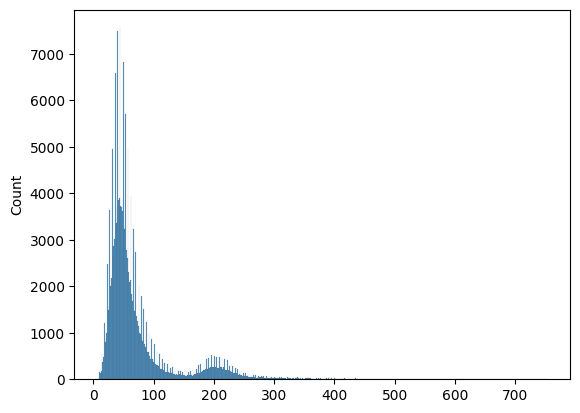

In [ ]:
# train corpus 길이 분포 파악
# bert tokenizer max_length 설정 위함
# 대체로 0 ~ 100개 토큰 사이에 분포해 있으므로 128개로 설정
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot([len(i) for i in train_corpus2])
plt.show()

In [ ]:
from transformers import BertTokenizer

# BERT Tokenizer를 이용한 text embedding 수행
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 토크나이저를 이용해 텍스트를 토큰화하고 인덱스로 변환
TOKEN_MAX_LENGTH = 128
tokenized_inputs = tokenizer(train_corpus2, padding=True, truncation=True, max_length=TOKEN_MAX_LENGTH, return_tensors="pt")

# 3분 소요
tokenized_inputs['input_ids'].shape

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


NameError: name 'train_corpus2' is not defined

In [ ]:
'''
  - input_ids: 입력 텍스트를 BERT 사전의 고유한 토큰 ID로 변환한 값입니다.
  - token_type_ids: 각 토큰이 문장 A인지, 문장 B인지 구분하기 위한 값입니다. 단일 문장의 경우는 모두 0, 두 문장이 있을 경우는 문장 A는 0, 문장 B는 1로 할당됩니다.
  - attention_mask: 모델이 실제 텍스트와 패딩을 구분할 수 있도록, 실제 텍스트는 1, 패딩된 부분은 0으로 할당된 값입니다.
'''
tokenized_inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
# train valid split
X_train, X_valid, y_train, y_valid = train_test_split(
    tokenized_inputs['input_ids'], train_labels, test_size=0.2, random_state=42
)

X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.long)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.long)

<ipython-input-45-73a6e6257f6f>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.long)
<ipython-input-45-73a6e6257f6f>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_valid_tensor = torch.tensor(X_valid, dtype=torch.long)


In [ ]:
# test set data 정의
tokenized_test_inputs = tokenizer(test_corpus, padding=True, truncation=True, max_length=TOKEN_MAX_LENGTH, return_tensors="pt")

X_test_tensor = torch.tensor(tokenized_test_inputs['input_ids'], dtype=torch.long)
y_test_tensor = torch.tensor(test_labels, dtype=torch.long)

<ipython-input-46-ca786a7c1ad0>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(tokenized_test_inputs['input_ids'], dtype=torch.long)


In [ ]:
X_train_tensor.shape, X_valid_tensor.shape

(torch.Size([146736, 128]), torch.Size([36685, 128]))

In [ ]:
y_train_tensor.shape, y_valid_tensor.shape

(torch.Size([146736]), torch.Size([36685]))

# 3. 데이터 구축

## 3.1) Simple Dataset

In [ ]:
# -1, 0, 1 -> 0, 1, 2 레이블로 변환
# -1 레이블이 cross entropy loss에서 error 발생
y_train_tensor = y_train_tensor + 1
y_valid_tensor = y_valid_tensor + 1
y_test_tensor = y_test_tensor + 1

In [ ]:
# Dataset 정의
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

# DataLoader 생성
train_dataset = TextDataset(X_train_tensor, y_train_tensor)
valid_dataset = TextDataset(X_valid_tensor, y_valid_tensor)
test_dataset = TextDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

In [ ]:
train_loader.dataset.texts.shape, valid_loader.dataset.texts.shape, test_loader.dataset.texts.shape

(torch.Size([146736, 128]), torch.Size([36685, 128]), torch.Size([24869, 128]))

In [ ]:
# 주어진 train, valid 데이터 크기 / batch size
len(train_loader), len(valid_loader), len(test_loader)

(2293, 574, 389)

In [ ]:
# 전처리 시간 절약 위한 dataloader 저장
# torch.save(train_loader, '/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/train_loader.pth')
# torch.save(valid_loader, '/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/valid_loader.pth')
# torch.save(test_loader, '/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/test_loader.pth')

## 3.2) BERT Dataset

In [19]:
# -1, 0, 1 -> 0, 1, 2
train_df['GeneralPolarity'] = train_df['GeneralPolarity'] + 1
valid_df['GeneralPolarity'] = valid_df['GeneralPolarity'] + 1

# exclude null
train_df = train_df.dropna(subset=['GeneralPolarity']).reset_index(drop=True) # 훈련, 검증 재분할
valid_df = valid_df.dropna(subset=['GeneralPolarity']).reset_index(drop=True) # 테스트 셋

In [24]:
def preprocess_text(corpus):

    corpus = remove_special_characters(corpus)
    normalize_repeat_characters(corpus)
    corpus = pos_text(corpus)
    corpus = remove_stopwords(corpus)

    return corpus

In [25]:
train_df['cleaned_text'] = train_df['RawText'].apply(preprocess_text)
valid_df['cleaned_text'] = valid_df['RawText'].apply(preprocess_text)

In [28]:
# train valid split
real_train_df, real_valid_df = train_test_split(
    train_df, test_size=0.2, random_state=42
)

real_test_df = valid_df.copy()

real_train_df = real_train_df.reset_index(drop=True)
real_valid_df = real_valid_df.reset_index(drop=True)
real_test_df = real_test_df.reset_index(drop=True)

real_train_df.shape, real_valid_df.shape, real_test_df.shape

((146736, 3), (36685, 3), (24869, 3))

In [30]:
# BERT Dataset 별도 구성
class BERTDataset(Dataset):

    def __init__(self, df, tokenizer):

        self.tokenizer = tokenizer
        self.df = df
        self.texts = df['cleaned_text']
        self.labels = df['GeneralPolarity']
        self.max_seq_length = 512 # max_seq_length

    def __len__(self):

        return len(self.labels)

    def __getitem__(self, idx):

        text = self.texts[idx]

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_seq_length,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True
        )

        input_ids = inputs['input_ids']
        masks = inputs['attention_mask']
        token_type_ids = inputs['token_type_ids']

        return (
            torch.tensor(input_ids, dtype=torch.long), # token_ids
            torch.tensor(masks, dtype=torch.long), # attention_mask
            torch.tensor(token_type_ids, dtype=torch.long), # token_type_ids
            torch.tensor(self.labels[idx], dtype = float) # labels
        )

from transformers import BertTokenizer

# BERT Tokenizer를 이용한 text embedding 수행
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

bert_train_dataset = BERTDataset(real_train_df, tokenizer)
bert_valid_dataset = BERTDataset(real_valid_df, tokenizer)
bert_test_dataset = BERTDataset(real_test_df, tokenizer)

bert_train_loader = DataLoader(bert_train_dataset, batch_size=8, shuffle=True)
bert_valid_loader = DataLoader(bert_valid_dataset, batch_size=8)
bert_test_loader = DataLoader(bert_test_dataset, batch_size=8)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [31]:
bert_train_loader.dataset.texts.shape, bert_valid_loader.dataset.texts.shape, bert_test_loader.dataset.texts.shape

((146736,), (36685,), (24869,))

In [32]:
len(bert_train_loader), len(bert_valid_loader), len(bert_test_loader)

(18342, 4586, 3109)

In [ ]:
# # 전처리 시간 절약 위한 dataloader 저장
# torch.save(bert_train_loader, '/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/bert_train_loader.pth')
# torch.save(bert_valid_loader, '/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/bert_valid_loader.pth')
# torch.save(bert_test_loader, '/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/bert_test_loader.pth')

# 4. 모델 정의

In [33]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 4.1) Vanill RNN

In [ ]:
class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):

        super(SentimentRNN, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # 임베딩 레이어
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)  # 바닐라 RNN 레이어
        self.fc = nn.Linear(hidden_dim, output_dim)  # Fully Connected 레이어

    def forward(self, x):

        embedded = self.embedding(x)  # 텍스트 임베딩
        rnn_out, _ = self.rnn(embedded)  # RNN 처리
        output = rnn_out[:, -1, :]  # 마지막 타임스텝의 은닉 상태를 가져옴
        output = self.fc(output)  # 분류를 위한 출력

        return output

# 하이퍼파라미터 설정
vocab_size = tokenizer.vocab_size
embedding_dim = 100  # 임베딩 차원
hidden_dim = 128     # RNN 은닉 상태 차원
output_dim = 3       # 긍정, 부정, 중립 3개의 클래스

# 모델 초기화
model = SentimentRNN(vocab_size=len(tokenizer), embedding_dim=embedding_dim, hidden_dim=hidden_dim, output_dim=output_dim).to(device)
model

SentimentRNN(
  (embedding): Embedding(30522, 100)
  (rnn): RNN(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)

## 4.2) LSTM

In [ ]:
import torch
import torch.nn as nn

class SentimentLSTM(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):

        super(SentimentLSTM, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # x: (batch_size, seq_length)
        embedded = self.embedding(x)  # (batch_size, seq_length, embedding_dim)

        # LSTM은 (hidden state, cell state)의 튜플을 반환합니다
        lstm_out, (hidden, cell) = self.lstm(embedded)  # lstm_out: (batch_size, seq_length, hidden_dim), hidden: (1, batch_size, hidden_dim)

        last_hidden = hidden.squeeze(0)  # (batch_size, hidden_dim)
        output = self.fc(last_hidden)  # (batch_size, output_dim)

        return output

# 하이퍼파라미터 설정
vocab_size = tokenizer.vocab_size
embedding_dim = 100  # 임베딩 차원
hidden_dim = 128     # LSTM 은닉 상태 차원
output_dim = 3       # 긍정, 부정, 중립 3개의 클래스

# 모델 초기화
lstm_model = SentimentLSTM(vocab_size=len(tokenizer), embedding_dim=embedding_dim, hidden_dim=hidden_dim, output_dim=output_dim).to(device)
lstm_model

SentimentLSTM(
  (embedding): Embedding(30522, 100)
  (lstm): LSTM(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)

## 4.3) BERT

In [34]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

bert_model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3).to(device)
bert_model

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

# 5. 모델 훈련

In [35]:
!pip install tensorboard

In [36]:
from torch.utils.tensorboard import SummaryWriter

# TensorBoard 설정
writer = SummaryWriter(log_dir="../runs/sentiment_analysis")

In [57]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import numpy as np

# 손실 함수와 옵티마이저 정의
neu_weight = np.round(37121 / 183421, 2) # 1.0
neg_weight = np.round(119806 / 183421, 2) # 0.0
pos_weight = 0.15 # 2.0
print(pos_weight, neu_weight, neg_weight)

class_weights = torch.tensor([neg_weight, neu_weight, pos_weight], dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(bert_model.parameters(), lr=0.01)

# lr scheduler 정의
lr_scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

0.15 0.2 0.65


In [38]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 11.9 MB/s eta 0:00:00


In [39]:
from torchmetrics.classification import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score
from torchmetrics import MetricCollection

from tqdm.auto import tqdm

In [55]:
# 훈련 함수 정의
def train_model(model, train_loader, criterion, optimizer):

    model.train()

    total_loss = 0

    # 성능 지표 객체 생성 및 GPU 이동
    accuracy_metric = MulticlassAccuracy(num_classes=3, average='weighted').to(device)
    precision_metric = MulticlassPrecision(num_classes=3, average='weighted').to(device)
    recall_metric = MulticlassRecall(num_classes=3, average='weighted').to(device)
    f1_metric = MulticlassF1Score(num_classes=3, average='weighted').to(device)

    for input_ids, attention_mask, token_type_ids, label in tqdm(train_loader):

        optimizer.zero_grad() # 1. 기울기 초기화

        # 2. data GPU 이동
        # texts = texts.to(device)
        # labels = labels.to(device)

        # bert 훈련용
        input_ids = torch.tensor(input_ids).to(device, dtype=torch.long)
        attention_mask = torch.tensor(attention_mask).to(device, dtype=torch.long)
        token_type_ids = torch.tensor(token_type_ids).to(device, dtype=torch.long)
        labels = torch.tensor(label).to(device, dtype=torch.long)

        outputs = model(input_ids, attention_mask, token_type_ids) # 3.예측값 산출
        loss = criterion(outputs.logits, labels) # 4. 손실 계산

        loss.backward() # 5. 역전파하여 기울기 계산
        optimizer.step() # 6. 파라미터 업데이트

        # loss 값 별도 저장
        total_loss += loss.item()

        # 예측값 저장
        _, preds = torch.max(outputs.logits, 1)

        # 성능 지표 업데이트
        accuracy_metric.update(preds, labels)
        precision_metric.update(preds, labels)
        recall_metric.update(preds, labels)
        f1_metric.update(preds, labels)

    # 에포크가 끝난 후 성능 지표 계산
    acc = accuracy_metric.compute().item()
    prec = precision_metric.compute().item()
    rec = recall_metric.compute().item()
    f1 = f1_metric.compute().item()

    # 성능 지표 초기화
    accuracy_metric.reset()
    precision_metric.reset()
    recall_metric.reset()
    f1_metric.reset()

    return total_loss / len(train_loader), acc, prec, rec, f1


# 평가 함수 정의
def evaluate_model(model, valid_loader, criterion):

    model.eval()

    with torch.no_grad():

        total_loss = 0

        # 성능 지표 객체 생성 및 GPU 이동
        accuracy_metric = MulticlassAccuracy(num_classes=3, average='weighted').to(device)
        precision_metric = MulticlassPrecision(num_classes=3, average='weighted').to(device)
        recall_metric = MulticlassRecall(num_classes=3, average='weighted').to(device)
        f1_metric = MulticlassF1Score(num_classes=3, average='weighted').to(device)

        for input_ids, attention_mask, token_type_ids, label in tqdm(valid_loader):

            # texts = texts.to(device)
            # labels = labels.to(device)

            input_ids = torch.tensor(input_ids).to(device, dtype=torch.long)
            attention_mask = torch.tensor(attention_mask).to(device, dtype=torch.long)
            token_type_ids = torch.tensor(token_type_ids).to(device, dtype=torch.long)
            labels = torch.tensor(label).to(device, dtype=torch.long)

            outputs = model(input_ids, attention_mask, token_type_ids)

            loss = criterion(outputs.logits, labels)
            total_loss += loss.item()

            # 예측값 저장
            _, preds = torch.max(outputs.logits, 1)

            # 성능 지표 업데이트
            accuracy_metric.update(preds, labels)
            precision_metric.update(preds, labels)
            recall_metric.update(preds, labels)
            f1_metric.update(preds, labels)

    # 에포크가 끝난 후 성능 지표 계산
    acc = accuracy_metric.compute().item()
    prec = precision_metric.compute().item()
    rec = recall_metric.compute().item()
    f1 = f1_metric.compute().item()

    # 성능 지표 초기화
    accuracy_metric.reset()
    precision_metric.reset()
    recall_metric.reset()
    f1_metric.reset()

    return total_loss / len(valid_loader), acc, prec, rec, f1

In [60]:
# 전체 훈련 및 평가를 수행하는 함수
def train_and_evaluate(model, train_loader, valid_loader, criterion, optimizer, num_epochs, lr_scheduler, checkpoint_path):

    best_val_loss = float('inf')

    for epoch in range(num_epochs):

        print(f"\n===== Epoch {epoch + 1} =====")
        # print(f'LR: {lr_scheduler.get_last_lr()}')

        # 모델 훈련
        train_loss, train_acc, train_prec, train_recall, train_f1 = train_model(model, train_loader, criterion, optimizer)

        # TensorBoard 기록: Train metrics
        writer.add_scalar("Loss/train", train_loss, epoch)
        writer.add_scalar("Accuracy/train", train_acc, epoch)
        writer.add_scalar("Precision/train", train_prec, epoch)
        writer.add_scalar("Recall/train", train_recall, epoch)
        writer.add_scalar("F1/train", train_f1, epoch)

        # 모델 평가
        valid_loss, valid_acc, valid_prec, valid_recall, valid_f1 = evaluate_model(model, valid_loader, criterion)

        # TensorBoard 기록: Train metrics
        writer.add_scalar("Loss/valid", valid_loss, epoch)
        writer.add_scalar("Accuracy/valid", valid_acc, epoch)
        writer.add_scalar("Precision/valid", valid_prec, epoch)
        writer.add_scalar("Recall/valid", valid_recall, epoch)
        writer.add_scalar("F1/valid", valid_f1, epoch)

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train Prec: {train_prec:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}")
        print(f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}, Valid Prec: {valid_prec:.4f}, Valid Recall: {valid_recall:.4f}, Valid F1: {valid_f1:.4f}")

        # # 최적의 valid loss 발생했을 때 모델 저장
        # if valid_loss < best_val_loss:
        #     best_val_loss = valid_loss
        #     torch.save(model.state_dict(), checkpoint_path)  # 최적의 모델 저장

        #     print(f"Epoch {epoch+1}: Model saved with validation loss: {valid_loss:.4f}")

        # lr_scheduler.step()

    writer.close()

In [58]:
num_epochs = 10

In [43]:
checkpoint_path = '/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/Vanilla_RNN_model.pt'

In [ ]:
# bert_train_loader = torch.load('/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/bert_train_loader.pth')
# bert_valid_loader = torch.load('/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/bert_valid_loader.pth')

<ipython-input-20-e3fcb20358fe>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  bert_train_loader = torch.load('/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Cl

In [ ]:
train_and_evaluate(bert_model, bert_train_loader, bert_valid_loader, criterion, optimizer, num_epochs=num_epochs, lr_scheduler=lr_scheduler, checkpoint_path=checkpoint_path)


===== Epoch 1 =====


  0%|          | 0/18342 [00:00<?, ?it/s]

<ipython-input-55-8434f00685ec>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(input_ids).to(device, dtype=torch.long)
<ipython-input-55-8434f00685ec>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_mask = torch.tensor(attention_mask).to(device, dtype=torch.long)
<ipython-input-55-8434f00685ec>:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  token_type_ids = torch.tensor(token_type_ids).to(device, dtype=torch.long)
<ipython-input-55-8434f00685ec>:26: UserWarning: To copy construct from a tensor, i

  0%|          | 0/4586 [00:00<?, ?it/s]

<ipython-input-55-8434f00685ec>:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(input_ids).to(device, dtype=torch.long)
<ipython-input-55-8434f00685ec>:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_mask = torch.tensor(attention_mask).to(device, dtype=torch.long)
<ipython-input-55-8434f00685ec>:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  token_type_ids = torch.tensor(token_type_ids).to(device, dtype=torch.long)
<ipython-input-55-8434f00685ec>:84: UserWarning: To copy construct from a tensor, i

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=../runs/sentiment_analysis

In [ ]:
# torch.save(model.state_dict(), '/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/Vanilla_RNN_model.pt')

# 6. 테스트 셋 검증

In [ ]:
# 평가 함수 정의
def test_model(model, test_loader, criterion):

    model.eval()

    with torch.no_grad():

        total_loss = 0

        # 성능 지표 객체 생성 및 GPU 이동
        accuracy_metric = MulticlassAccuracy(num_classes=3, average='weighted').to(device)
        precision_metric = MulticlassPrecision(num_classes=3, average='weighted').to(device)
        recall_metric = MulticlassRecall(num_classes=3, average='weighted').to(device)
        f1_metric = MulticlassF1Score(num_classes=3, average='weighted').to(device)

        for texts, labels in test_loader:

            texts = texts.to(device)
            labels = labels.to(device)

            outputs = model(texts)

            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # 예측값 저장
            _, preds = torch.max(outputs, 1)

            # 성능 지표 업데이트
            accuracy_metric.update(preds, labels)
            precision_metric.update(preds, labels)
            recall_metric.update(preds, labels)
            f1_metric.update(preds, labels)

    # 에포크가 끝난 후 성능 지표 계산
    acc = accuracy_metric.compute().item()
    prec = precision_metric.compute().item()
    rec = recall_metric.compute().item()
    f1 = f1_metric.compute().item()

    # 성능 지표 초기화
    accuracy_metric.reset()
    precision_metric.reset()
    recall_metric.reset()
    f1_metric.reset()

    return total_loss / len(valid_loader), acc, prec, rec, f1

In [ ]:
# 전체 훈련 및 평가를 수행하는 함수
def test(model, test_loader, criterion, num_epochs):

    best_val_loss = float('inf')

    for epoch in range(num_epochs):

        print(f"\n===== Epoch {epoch + 1} =====")

        test_loss, test_acc, test_prec, test_recall, test_f1 = test_model(model, test_loader, criterion)

        print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}, Test Prec: {test_prec:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}")

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# 손실 함수와 옵티마이저 정의
neu_weight = np.round(37121 / 183421, 2) # 1.0
neg_weight = np.round(119806 / 183421, 2) # 0.0
pos_weight = 0.15 # 2.0
print(pos_weight, neu_weight, neg_weight)

class_weights = torch.tensor([neg_weight, neu_weight, pos_weight], dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(lstm_model.parameters(), lr=0.0001)

0.15 0.2 0.65


In [ ]:
test(lstm_model, test_loader, criterion, num_epochs)


===== Epoch 1 =====
Test Loss: 0.7089, Test Acc: 0.4986, Test Prec: 0.4370, Test Recall: 0.4986, Test F1: 0.4606

===== Epoch 2 =====
Test Loss: 0.7089, Test Acc: 0.4986, Test Prec: 0.4370, Test Recall: 0.4986, Test F1: 0.4606

===== Epoch 3 =====
Test Loss: 0.7089, Test Acc: 0.4986, Test Prec: 0.4370, Test Recall: 0.4986, Test F1: 0.4606

===== Epoch 4 =====
Test Loss: 0.7089, Test Acc: 0.4986, Test Prec: 0.4370, Test Recall: 0.4986, Test F1: 0.4606

===== Epoch 5 =====
Test Loss: 0.7089, Test Acc: 0.4986, Test Prec: 0.4370, Test Recall: 0.4986, Test F1: 0.4606

===== Epoch 6 =====
Test Loss: 0.7089, Test Acc: 0.4986, Test Prec: 0.4370, Test Recall: 0.4986, Test F1: 0.4606

===== Epoch 7 =====
Test Loss: 0.7089, Test Acc: 0.4986, Test Prec: 0.4370, Test Recall: 0.4986, Test F1: 0.4606

===== Epoch 8 =====
Test Loss: 0.7089, Test Acc: 0.4986, Test Prec: 0.4370, Test Recall: 0.4986, Test F1: 0.4606

===== Epoch 9 =====
Test Loss: 0.7089, Test Acc: 0.4986, Test Prec: 0.4370, Test Recall